In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
z_Score = (df_train['SalePrice'] - df_train['SalePrice'].mean())/df_train['SalePrice'].std()
df_train[((z_Score >-3) & (z_Score <=6))]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
z_Score.unique()

array([ 3.47154270e-01,  7.28582419e-03,  5.35970074e-01, -5.15104565e-01,
        8.69544659e-01, -4.77341404e-01,  1.58704471e+00,  2.40158648e-01,
       -6.42240539e-01, -7.92034410e-01, -6.47275627e-01,  2.06537808e+00,
       -4.64753684e-01,  1.24088241e+00, -3.01113321e-01, -6.15806327e-01,
       -4.01815083e-01, -1.14449058e+00, -2.75937881e-01, -5.27692285e-01,
        1.81739999e+00, -5.22657197e-01,  6.17790255e-01, -3.38876482e-01,
        9.48847297e-01, -5.80560710e-01,  1.57445699e+00,  3.34566550e-01,
       -1.41512656e+00, -1.77387659e+00, -3.97409381e-01, -1.28545282e-02,
       -1.94117699e-01,  1.21570697e+00,  1.61222015e+00, -4.52165964e-01,
       -3.51464202e-01, -9.05323892e-01, -1.24519234e+00, -2.63350161e-01,
       -1.37472958e-01, -6.37834837e-01, -5.02516845e-01,  1.74942630e+00,
        7.39714913e-01,  8.65768343e-01, -8.54973011e-01, -6.78744928e-01,
       -4.93589168e-02, -8.36091431e-01, -8.92736172e-01,  2.56888689e+00,
       -6.40981767e-01, -

In [4]:
z_Score = (df_train['SalePrice'] - df_train['SalePrice'].mean())/df_train['SalePrice'].std()
    
df_train[((z_Score >-3) & (z_Score <=3))]
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<AxesSubplot:>

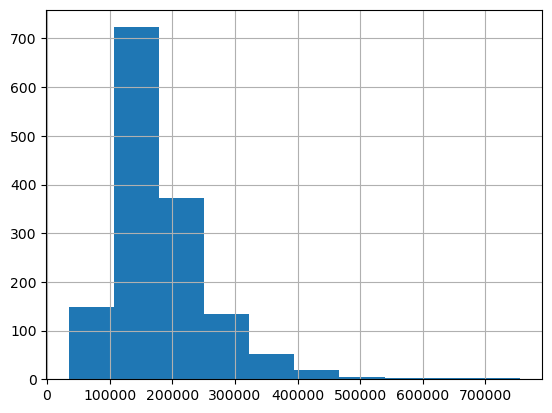

In [5]:
df_train['SalePrice'].hist()

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

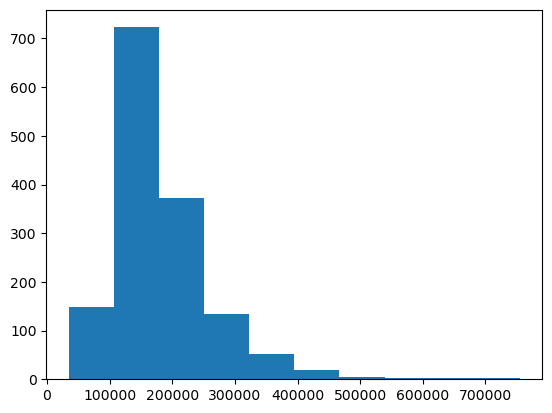

In [6]:
plt.hist(df_train['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b1c506e910>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1c506eeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1c506e640>],
 'medians': [<matplotlib.lines.Line2D at 0x1b1c5082490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b1c5082760>],
 'means': []}

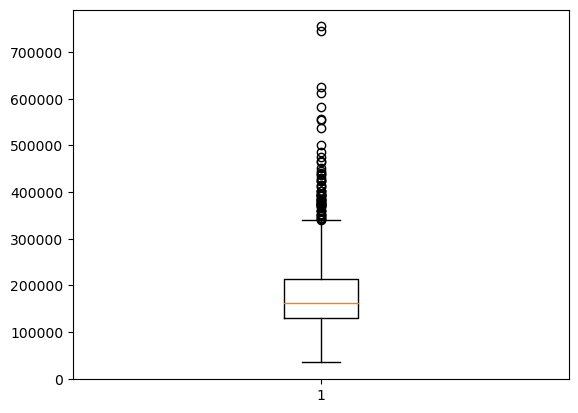

In [7]:
plt.boxplot(df_train['SalePrice'])

In [8]:
z_scores = (df_train['SalePrice'] - df_train['SalePrice'].mean())/df_train['SalePrice'].std()

In [9]:
sum((z_scores > -1) & (z_scores <= 1))/1460

0.7842465753424658

In [10]:
sum((z_scores > -2) & (z_scores <= 2))/1460

0.9568493150684931

In [11]:
sum((z_scores > -3) & (z_scores <= 3))/1460

0.9849315068493151